# ДЗ: Подмена надписи/элементов логотипа по **двум цветам**

- Выбранный логотип: **Пятёрочка**
- Два разных фона: **апельсины** и **космос**
- Правило подмены: **красные** области → апельсины, **зелёные** области → космос.
        
Для устойчивого выделения используем HSV-порог: работаем по тону (Hue), насыщенности и яркости.


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from pathlib import Path
import cv2

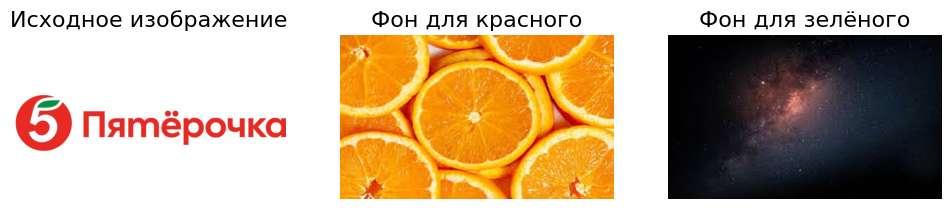

In [3]:
logo_path = Path("pyaterochka.png")
bg_red_path = Path("images.jpg")
bg_green_path = Path("Космос.jpg")

logo = Image.open(logo_path).convert("RGB")
W, H = logo.size
bg_red   = Image.open(bg_red_path).convert("RGB").resize((W, H), Image.LANCZOS)
bg_green = Image.open(bg_green_path).convert("RGB").resize((W, H), Image.LANCZOS)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(logo)
plt.axis('off')
plt.title("Исходное изображение", fontsize=16)
plt.subplot(1,3,2)
plt.imshow(bg_red)
plt.axis('off')
plt.title("Фон для красного", fontsize=16)
plt.subplot(1,3,3)
plt.imshow(bg_green)
plt.axis('off')
plt.title("Фон для зелёного", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Маска зелёного')

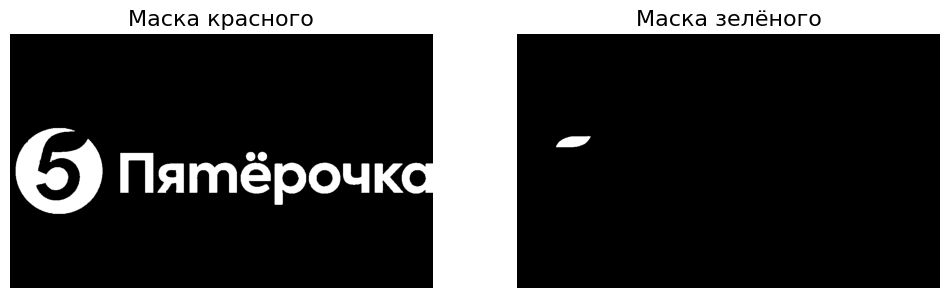

In [16]:
logo_arr = cv2.cvtColor(np.array(logo), cv2.COLOR_RGB2BGR)
bg_red_arr = cv2.cvtColor(np.array(bg_red), cv2.COLOR_RGB2BGR)
bg_green_arr = cv2.cvtColor(np.array(bg_green), cv2.COLOR_RGB2BGR)

b, g, r = cv2.split(logo_arr)

red_mask = (r > 120) & (r > g * 1.2) & (r > b * 1.2)
green_mask = (g > 100) & (g > r * 1.2) & (g > b * 1.2)

red_mask = red_mask.astype(np.uint8) * 255
green_mask = green_mask.astype(np.uint8) * 255

red_part_logo = cv2.bitwise_and(logo_arr, logo_arr, mask=cv2.bitwise_not(red_mask))
green_part_logo = cv2.bitwise_and(red_part_logo, red_part_logo, mask=cv2.bitwise_not(green_mask))

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(red_mask, cmap='gray')
plt.axis('off')
plt.title("Маска красного", fontsize=16)
plt.subplot(1,2,2)
plt.imshow(green_mask, cmap='gray')
plt.axis('off')
plt.title("Маска зелёного", fontsize=16)

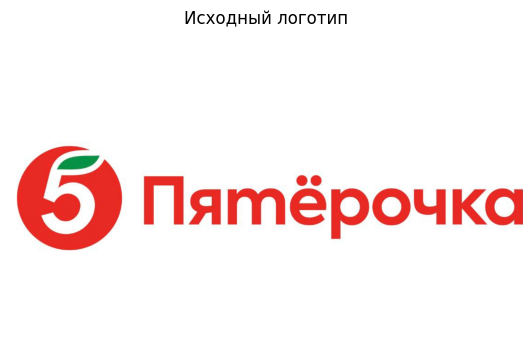

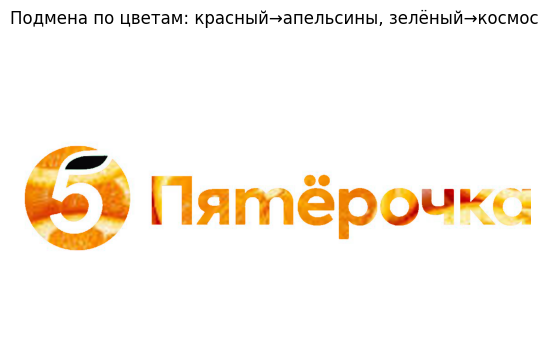

In [17]:
red_bg_part = cv2.bitwise_and(bg_red_arr, bg_red_arr, mask=red_mask)
green_bg_part = cv2.bitwise_and(bg_green_arr, bg_green_arr, mask=green_mask)

result = cv2.bitwise_or(green_part_logo, red_bg_part)
result = cv2.bitwise_or(result, green_bg_part)

plt.figure(figsize=(10,4))
plt.imshow(cv2.cvtColor(logo_arr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Исходный логотип")

plt.figure(figsize=(10,4))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Подмена по цветам: красный→апельсины, зелёный→космос")
plt.show()